In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')

# Low-Pass Filter
A Low-Pass Filter is used to remove the higher frequencies in a signal of data.

fc is the cutoff frequency as a fraction of the sampling rate, and b is the transition band also as a function of the sampling rate. N must be an odd number in our calculation as well.

In [4]:
def lowpass_filter(signal):
    fc = 0.1
    b = 0.08
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)

    return np.convolve(signal, sinc_func)

# High-Pass Filter
High-Pass Filter will remove the lower frequencies from a signal of data.

fc is the cutoff frequency as a fraction of the sampling rate, and b is the transition band also as a function of the sampling rate. N must be an odd number.

In [5]:
def highpass_filter(signal):
    fc = 0.1
    b = 0.08
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = np.blackman(N)
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)

    # reverse function
    sinc_func = -sinc_func
    sinc_func[int((N - 1) / 2)] += 1

    return np.convolve(signal, sinc_func)

# Band-Pass Filter
The Band-Pass Filter reduce the frequencies outside of a defined range of frequencies. We can think of it as low-passing and high-passing at the same time.

fL and fH are the low and high cutoff frequencies respectively as a fraction of the sampling rate.

In [6]:
def bandpass_filter(signal):
    fL = 0.1
    fH = 0.3
    b = 0.08
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1  # Make sure that N is odd.
    n = np.arange(N)

    # low-pass filter
    hlpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
    hlpf *= np.blackman(N)
    hlpf = hlpf / np.sum(hlpf)

    # high-pass filter 
    hhpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
    hhpf *= np.blackman(N)
    hhpf = hhpf / np.sum(hhpf)
    hhpf = -hhpf
    hhpf[int((N - 1) / 2)] += 1

    h = np.convolve(hlpf, hhpf)
    return np.convolve(signal, h)

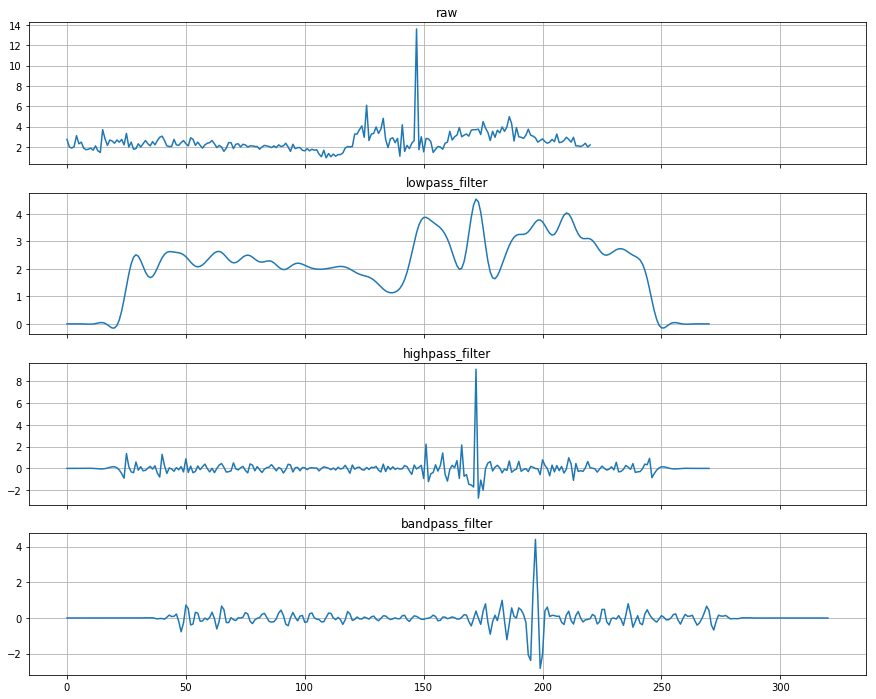

In [7]:
row = 4
fig, axes = plt.subplots(row, 1, figsize=(15, row*3), sharex=True)

signal = df['10 Min Std Dev']

i = 0
axes[i].plot(signal)
axes[i].set_title('raw')
axes[i].grid()

i += 1
axes[i].plot(lowpass_filter(signal))
axes[i].set_title('lowpass_filter')
axes[i].grid()

i += 1
axes[i].plot(highpass_filter(signal))
axes[i].set_title('highpass_filter')
axes[i].grid()

i += 1
axes[i].plot(bandpass_filter(signal))
axes[i].set_title('bandpass_filter')
axes[i].grid()